# Load Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import copy
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import *
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
import warnings
from sklearn.manifold import TSNE
from sklearn.tree._tree import TREE_LEAF
warnings.filterwarnings("ignore")

# Utility Functions


In [3]:
def Model_Metrics(y_test,y_pred):
  acc = accuracy_score(y_pred=y_pred, y_true=y_test)
  pre = precision_score(y_pred=y_pred, y_true=y_test,average="micro")
  rec = recall_score(y_pred=y_pred, y_true=y_test,average = 'micro')
  print("Accuracy : " + str(np.round(acc,4)*100) + "%")
  print("Precision : " + str(np.round(pre,4)))
  print("Recall : " + str(np.round(rec,4)))

def plot_roc(model,X,y):
  y_prob = model.predict_proba(X)
  class_count = y.shape[1]
  false_positive = {}
  true_positive = {}
  roc = {}
  for i in range(class_count):
    false_positive[i], true_positive[i], temp = roc_curve(y[:, i], y_prob[:, i])
    roc[i] = auc(false_positive[i], true_positive[i])
  for i in range(len(roc)):
    plt.plot(false_positive[i], true_positive[i],label='ROC curve of class '+str(i)+' , area = '+str(round(roc[i],3)))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

# Load data

In [4]:
# Aniket 
path1 = '/content/drive/MyDrive/Projects/DMG_Assignment/Assignment_1/data_1.csv'
path2 = '/content/drive/MyDrive/Projects/DMG_Assignment/Assignment_1/data_2.csv'

# Amulya
# path1 = '/content/drive/MyDrive/DMG_Assignment/Assignment_1/data_1.csv' 
# path2 = '/content/drive/MyDrive/DMG_Assignment/Assignment_1/data_2.csv' 

data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)

# A

In [5]:
path = path1
data = pd.read_csv(path) 
data = data.drop(["severe_decelerations"], axis=1)
data = data.drop(["percentage_of_time_with_abnormal_long_term_variability"],axis =1)
y = data['fetal_health']
X = data.drop(['fetal_health'], axis = 1)
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,17,2.1,10.4,130,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,16,2.1,13.4,130,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,16,2.4,23.0,117,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,16,2.4,19.9,117,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,28,1.4,12.9,66,88,154,5,0,135,134,137,7,1,1


## Stratified Spliting

In [6]:
classes = [1,2,3]
y_other = label_binarize(y, classes=classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train_other, X_test_other, y_train_other, y_test_other = train_test_split(X, y_other, test_size=0.20, random_state=42, stratify=y)
print("Shape of X train : ",X_train.shape)
print("Shape of X test : ",X_test.shape)
print("Shape of y train : ",y_train.shape)
print("Shape of y test : ",y_test.shape)

Shape of X train :  (1160, 19)
Shape of X test :  (290, 19)
Shape of y train :  (1160,)
Shape of y test :  (290,)


In [7]:
print("Count of classes in original data")
print(data['fetal_health'].value_counts())
print("Count of classes in test data")
print(y_test.value_counts())

Count of classes in original data
1    1200
2     200
3      50
Name: fetal_health, dtype: int64
Count of classes in test data
1    240
2     40
3     10
Name: fetal_health, dtype: int64


## Q1

Accuracy : 90.34%
Precision : 0.9034
Recall : 0.9034


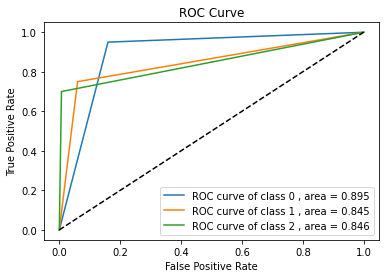

In [ ]:
DT_A_1 = DecisionTreeClassifier(random_state=42)
DT_A_11 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
DT_A_1.fit(X_train, y_train)
DT_A_11.fit(X_train_other, y_train_other)
y_pred = DT_A_1.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(DT_A_11,X_test_other,y_test_other)

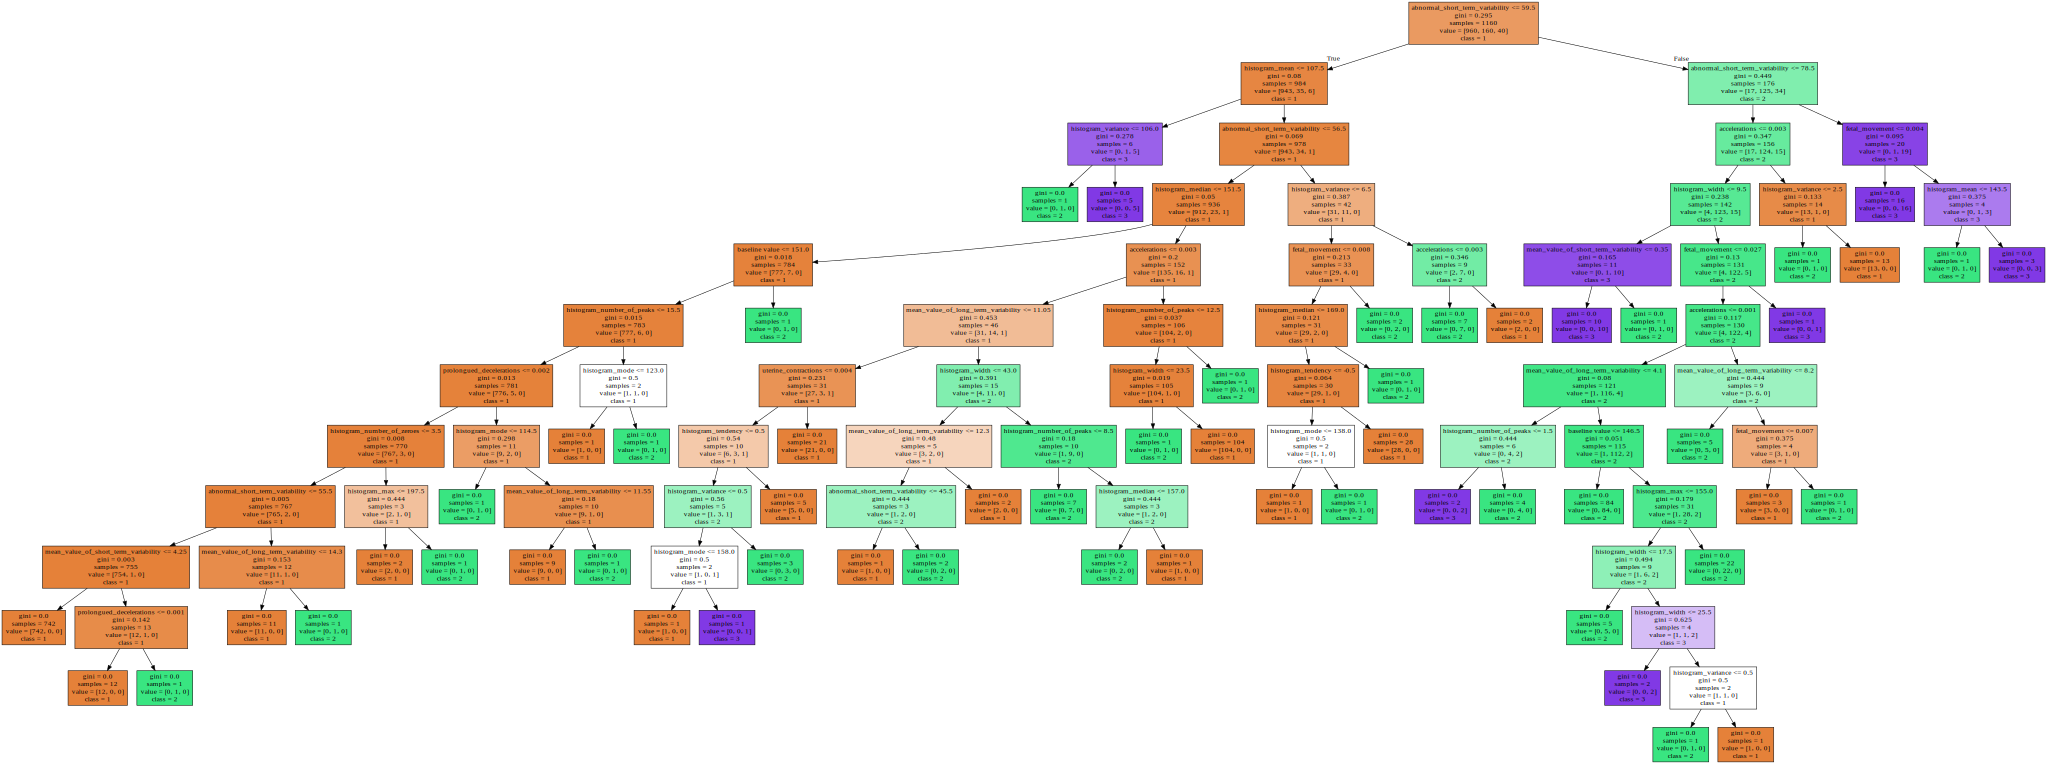

In [ ]:
dot_data = tree.export_graphviz(DT_A_1, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['1', '2', '3'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render('/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_A_1')
graph

## Q2

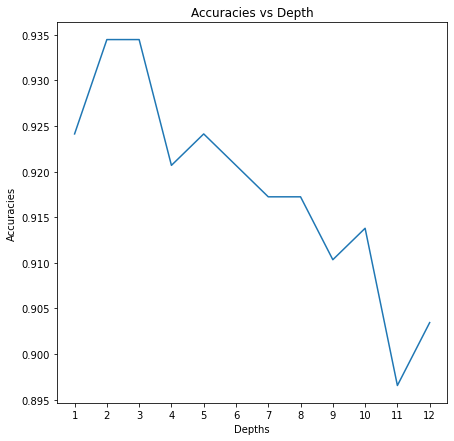

In [ ]:
depths = [1,2,3,4,5,6,7,8,9,10,11,12]
accuracies = []
for depth in depths:
  clf = DecisionTreeClassifier(random_state=42, max_depth= depth)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_pred=y_pred, y_true=y_test)
  accuracies.append(acc)

fig = plt.figure(figsize=(7,7))
plt.plot(depths, accuracies)
plt.xticks(depths)
plt.ylabel("Accuracies")
plt.xlabel("Depths")
plt.title("Accuracies vs Depth")
plt.show()

## Q3

In [ ]:
Criterion = ['gini', 'entropy']
Splitter = ['best', 'random']
min_samples_split = [2,5,10,20]
max_depth = [1,2,4,8,11,12]
min_samples_leaf = [1,2,10,20]
max_features =['sqrt', 'log2']
class_weight =[{1: 1, 2: 4, 3:24},{1:10, 2:5, 3:1}]
max_leaf_nodes =[2,6,10,15,20]
df = pd.DataFrame(columns=["Criterion", "Splitter", "Min_Samples_Split", "Max_Depth", 
                           "Min_Sample_Leaf", "Max_Feature", "Class_Weight", "Max_leaf_Nodes", 
                           "Precision", "Recall", "Accuracy"])

In [ ]:
for cr in Criterion:
  for sp in Splitter:
    for mss in min_samples_split:
      for d in max_depth:
        for msl in min_samples_leaf:
          for mf in max_features:
            for cw in class_weight:
              for mln in max_leaf_nodes:
                clf = DecisionTreeClassifier(random_state=42, criterion= cr, splitter=sp,min_samples_split = mss, max_depth = d, min_samples_leaf = msl, max_features = mf, class_weight = cw, max_leaf_nodes = mln)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                prec = precision_score(y_pred= y_pred, y_true= y_test, average= 'macro')
                rec = recall_score(y_pred= y_pred, y_true= y_test, average= 'macro')
                acc = accuracy_score(y_pred=y_pred, y_true=y_test)
                df.loc[len(df)] = [cr,sp,mss,d,msl,mf,cw,mln,prec,rec,acc]

In [ ]:
df

,Criterion,Splitter,Min_Samples_Split,Max_Depth,Min_Sample_Leaf,Max_Feature,Class_Weight,Max_leaf_Nodes,Precision,Recall,Accuracy
0,gini,best,2,1,1,sqrt,"{1: 1, 2: 4, 3: 24}",2,0.370085,0.550000,0.810345
1,gini,best,2,1,1,sqrt,"{1: 1, 2: 4, 3: 24}",6,0.370085,0.550000,0.810345
2,gini,best,2,1,1,sqrt,"{1: 1, 2: 4, 3: 24}",10,0.370085,0.550000,0.810345
3,gini,best,2,1,1,sqrt,"{1: 1, 2: 4, 3: 24}",15,0.370085,0.550000,0.810345
4,gini,best,2,1,1,sqrt,"{1: 1, 2: 4, 3: 24}",20,0.370085,0.550000,0.810345
...,...,...,...,...,...,...,...,...,...,...,...
7675,entropy,random,20,12,20,log2,"{1: 10, 2: 5, 3: 1}",2,0.275862,0.333333,0.827586
7676,entropy,random,20,12,20,log2,"{1: 10, 2: 5, 3: 1}",6,0.496189,0.579167,0.868966
7677,entropy,random,20,12,20,log2,"{1: 10, 2: 5, 3: 1}",10,0.484001,0.533333,0.858621
7678,entropy,random,20,12,20,log2,"{1: 10, 2: 5, 3: 1}",15,0.484001,0.533333,0.858621


Accuracy : 60.0%
Precision : 0.6
Recall : 0.6


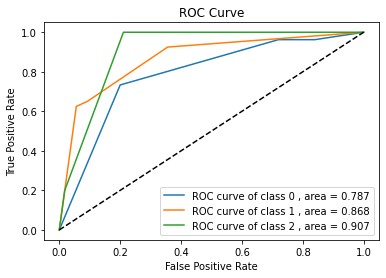

In [ ]:
clf1 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 10)
clf11 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', max_leaf_nodes = 10))
clf1.fit(X_train, y_train)
clf11.fit(X_train_other, y_train_other)
y_pred = clf1.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf11,X_test_other,y_test_other)

Accuracy : 61.38%
Precision : 0.6138
Recall : 0.6138


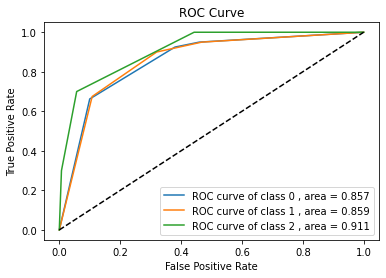

In [ ]:
clf2 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'best',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 10)
clf21 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'best',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', max_leaf_nodes = 10))
clf2.fit(X_train, y_train)
clf21.fit(X_train_other, y_train_other)
y_pred = clf2.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf21,X_test_other,y_test_other)

Accuracy : 77.92999999999999%
Precision : 0.7793
Recall : 0.7793


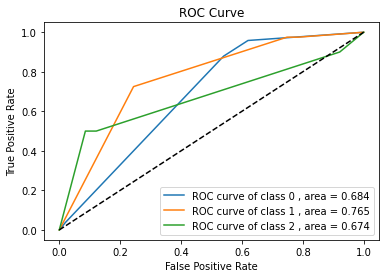

In [ ]:
clf3 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 10)
clf31 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', max_leaf_nodes = 10))
clf3.fit(X_train, y_train)
clf31.fit(X_train_other, y_train_other)
y_pred = clf3.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf31,X_test_other,y_test_other)

Accuracy : 77.92999999999999%
Precision : 0.7793
Recall : 0.7793


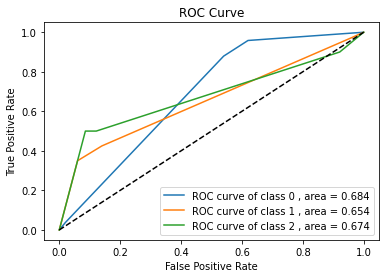

In [ ]:
clf4 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 10)
clf41 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 20, max_features = 'sqrt', max_leaf_nodes = 10))
clf4.fit(X_train, y_train)
clf41.fit(X_train_other, y_train_other)
y_pred = clf4.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf41,X_test_other,y_test_other)

Accuracy : 79.66%
Precision : 0.7966
Recall : 0.7966


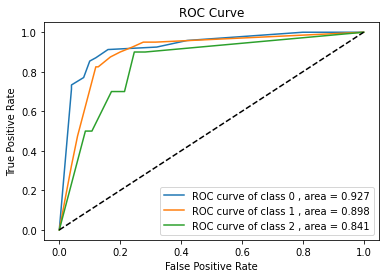

In [ ]:
clf5 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 20, max_features = 'sqrt', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 10)
clf51 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 20, max_features = 'sqrt', max_leaf_nodes = 10))
clf5.fit(X_train, y_train)
clf51.fit(X_train_other, y_train_other)
y_pred = clf5.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf51,X_test_other,y_test_other)

Accuracy : 82.76%
Precision : 0.8276
Recall : 0.8276


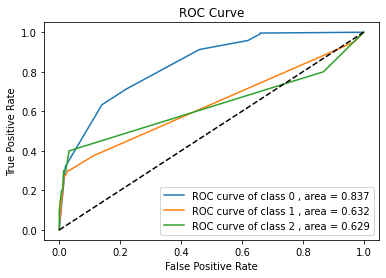

In [ ]:
clf6 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'sqrt', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 10)
clf61 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'sqrt', max_leaf_nodes = 10))
clf6.fit(X_train, y_train)
clf61.fit(X_train_other, y_train_other)
y_pred = clf6.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf61,X_test_other,y_test_other)

Accuracy : 82.76%
Precision : 0.8276
Recall : 0.8276


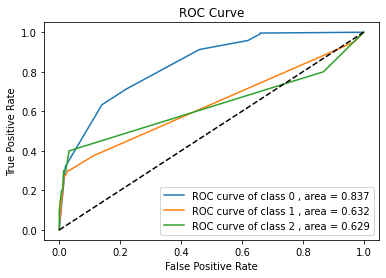

In [ ]:
clf7 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 10)
clf71 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', max_leaf_nodes = 10))
clf7.fit(X_train, y_train)
clf71.fit(X_train_other, y_train_other)
y_pred = clf7.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf71,X_test_other,y_test_other)

Accuracy : 80.0%
Precision : 0.8
Recall : 0.8


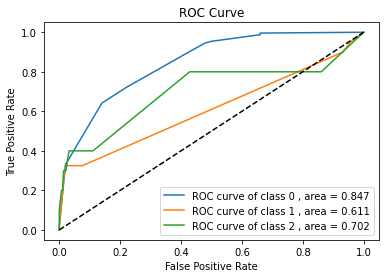

In [ ]:
clf8 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 15)
clf81 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', max_leaf_nodes = 15))
clf8.fit(X_train, y_train)
clf81.fit(X_train_other, y_train_other)
y_pred = clf8.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf81,X_test_other,y_test_other)

Accuracy : 78.97%
Precision : 0.7897
Recall : 0.7897


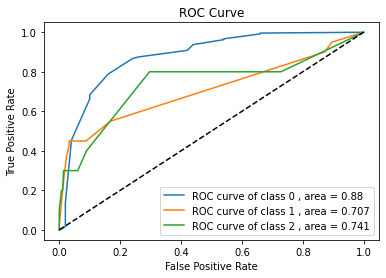

In [ ]:
clf9 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 20)
clf91 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', max_leaf_nodes = 20))
clf9.fit(X_train, y_train)
clf91.fit(X_train_other, y_train_other)
y_pred = clf9.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf91,X_test_other,y_test_other)

Accuracy : 76.9%
Precision : 0.769
Recall : 0.769


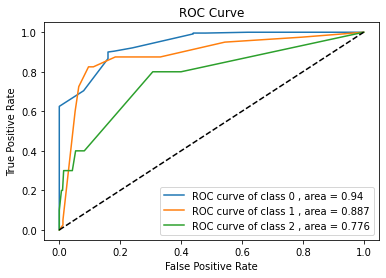

In [ ]:
clf10 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 20)
clf101 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', max_leaf_nodes = 20))
clf10.fit(X_train, y_train)
clf101.fit(X_train_other, y_train_other)
y_pred = clf10.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf101,X_test_other,y_test_other)

Accuracy : 77.92999999999999%
Precision : 0.7793
Recall : 0.7793


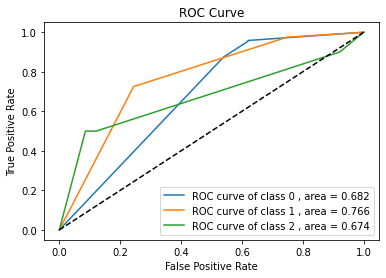

In [ ]:
clf11 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 2, max_features = 'log2', 
                             class_weight = {1: 1, 2: 4, 3:24}, max_leaf_nodes = 20)
clf111 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 2, max_features = 'log2', max_leaf_nodes = 20))
clf11.fit(X_train, y_train)
clf111.fit(X_train_other, y_train_other)
y_pred = clf11.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf111,X_test_other,y_test_other)

Accuracy : 77.92999999999999%
Precision : 0.7793
Recall : 0.7793


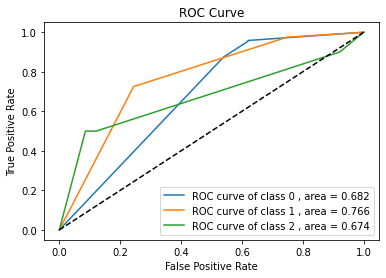

In [ ]:
clf12 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 1, max_features = 'sqrt', 
                             class_weight = {1: 1, 2: 4, 3:24} , max_leaf_nodes = 20)
clf121 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 1, max_features = 'sqrt', max_leaf_nodes = 20))
clf12.fit(X_train, y_train)
clf121.fit(X_train_other, y_train_other)
y_pred = clf12.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf121,X_test_other,y_test_other)

Accuracy : 84.14%
Precision : 0.8414
Recall : 0.8414


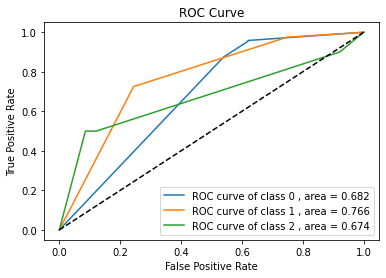

In [ ]:
clf13 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 2, max_features = 'sqrt', 
                             class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 20)
clf131 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 2, min_samples_leaf = 2, max_features = 'sqrt', max_leaf_nodes = 20))
clf13.fit(X_train, y_train)
clf131.fit(X_train_other, y_train_other)
y_pred = clf13.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf131,X_test_other,y_test_other)

Accuracy : 88.97%
Precision : 0.8897
Recall : 0.8897


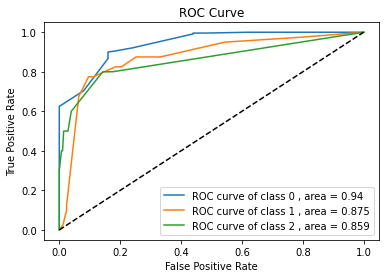

In [ ]:
clf14 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'log2', 
                             class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 20)
clf141 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 1, max_features = 'log2', max_leaf_nodes = 20))
clf14.fit(X_train, y_train)
clf141.fit(X_train_other, y_train_other)
y_pred = clf14.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf141,X_test_other,y_test_other)

Accuracy : 87.24%
Precision : 0.8724
Recall : 0.8724


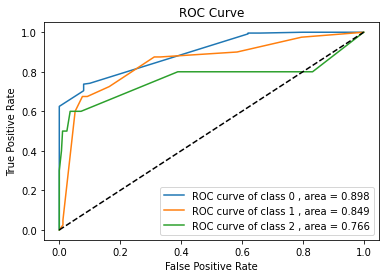

In [ ]:
clf15 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 2, max_features = 'sqrt', 
                             class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 15)
clf151 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 1, max_features = 'sqrt', max_leaf_nodes = 15))
clf15.fit(X_train, y_train)
clf151.fit(X_train_other, y_train_other)
y_pred = clf15.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf151,X_test_other,y_test_other)

Accuracy : 88.97%
Precision : 0.8897
Recall : 0.8897


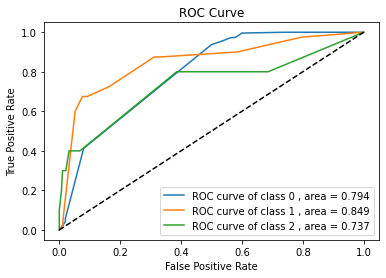

In [ ]:
clf16 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 5, max_features = 'log2', 
                             class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 15)
clf161 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 5, max_features = 'log2', max_leaf_nodes = 15))
clf16.fit(X_train, y_train)
clf161.fit(X_train_other, y_train_other)
y_pred = clf16.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf161,X_test_other,y_test_other)

Accuracy : 87.24%
Precision : 0.8724
Recall : 0.8724


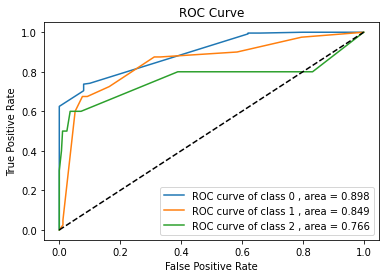

In [ ]:
clf17 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 1, max_features = 'log2', 
                             class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 15)
clf171 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 20, max_depth = 8, min_samples_leaf = 1, max_features = 'log2', max_leaf_nodes = 15))
clf17.fit(X_train, y_train)
clf171.fit(X_train_other, y_train_other)
y_pred = clf17.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf171,X_test_other,y_test_other)

Accuracy : 91.03%
Precision : 0.9103
Recall : 0.9103


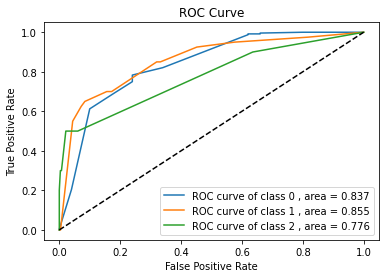

In [ ]:
clf18 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1, max_features = 'log2', 
                            class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 15)
clf181 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'random',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1, max_features = 'log2', max_leaf_nodes = 15))
clf18.fit(X_train, y_train)
clf181.fit(X_train_other, y_train_other)
y_pred = clf18.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf181,X_test_other,y_test_other)

Accuracy : 89.66%
Precision : 0.8966
Recall : 0.8966


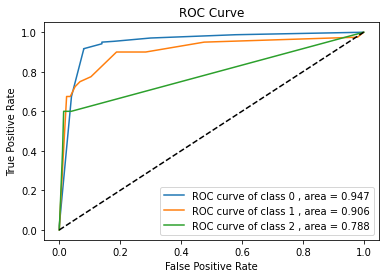

In [ ]:
clf19 = DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1, max_features = 'sqrt', 
                             class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 15)
clf191 = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'entropy', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1, max_features = 'sqrt', max_leaf_nodes = 15))
clf19.fit(X_train, y_train)
clf191.fit(X_train_other, y_train_other)
y_pred = clf19.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(clf191,X_test_other,y_test_other)

Accuracy : 92.41%
Precision : 0.9241
Recall : 0.9241


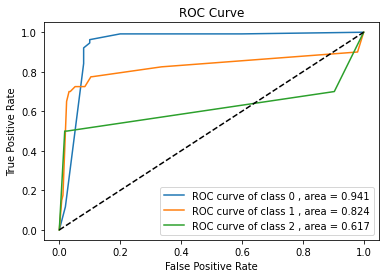

In [ ]:
DT_A = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1, max_features = 'sqrt', 
                             class_weight = {1: 10, 2: 5, 3: 1}, max_leaf_nodes = 15)
DT_A_other = OneVsRestClassifier(DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1, max_features = 'sqrt',  max_leaf_nodes = 15))
DT_A.fit(X_train, y_train)
DT_A_other.fit(X_train_other, y_train_other)
y_pred = DT_A.predict(X_test)
Model_Metrics(y_test,y_pred)
plot_roc(DT_A_other,X_test_other,y_test_other)

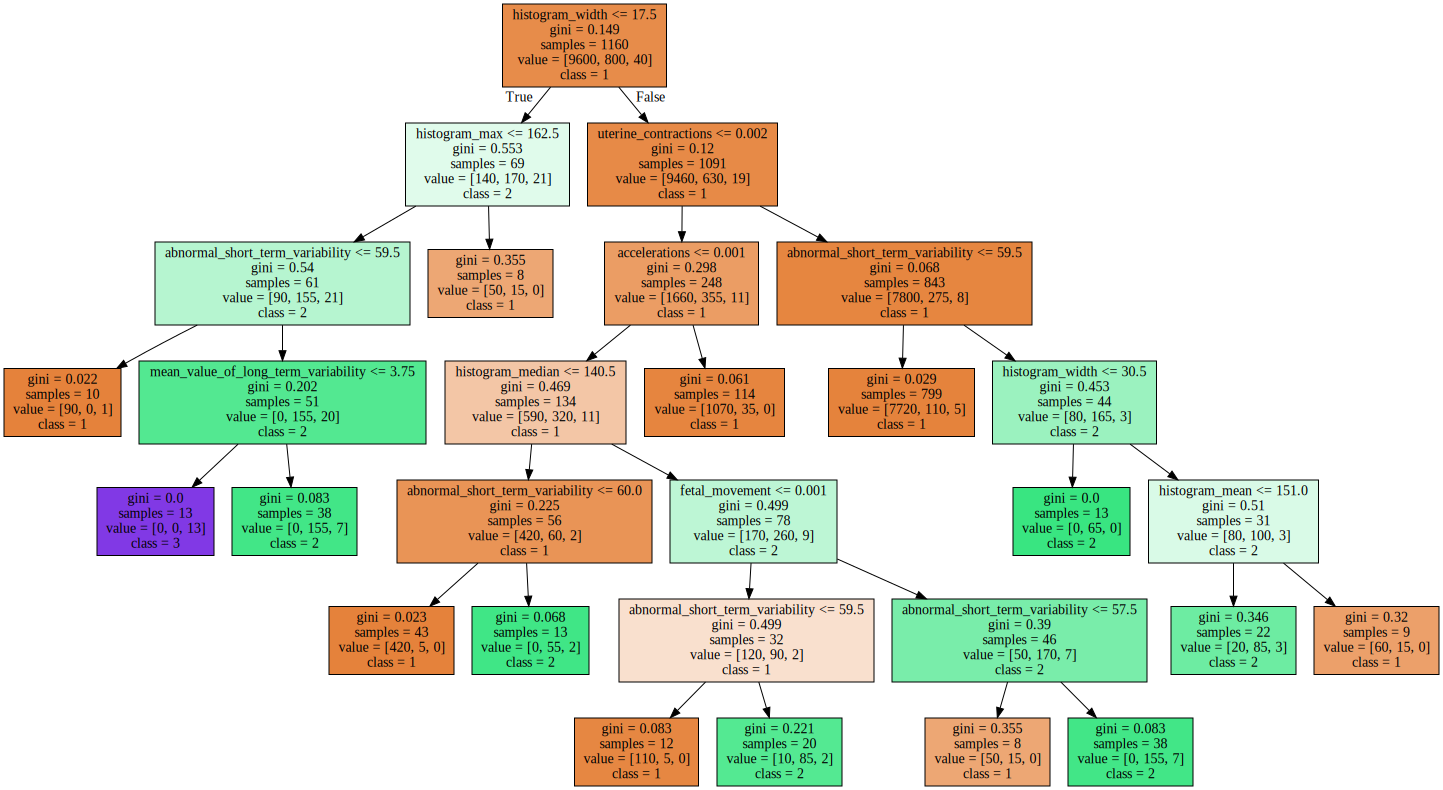

In [ ]:
dot_data = tree.export_graphviz(DT_A, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['1', '2', '3'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render('/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_A')
graph

# B


## Q1


In [ ]:
DT_B_1 = copy.deepcopy(DT_A)
DT_B_1_other = copy.deepcopy(DT_A_other)

In [ ]:
DT_B_1.tree_.children_left[(DT_B_1.tree_.children_left[0])] = TREE_LEAF
DT_B_1_other.estimators_[0].tree_.children_left[(DT_B_1_other.estimators_[0].tree_.children_left[0])] = TREE_LEAF

Accuracy : 89.31%
Precision : 0.8931
Recall : 0.8931


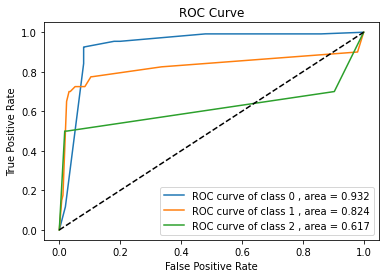

In [ ]:
Model_Metrics(DT_B_1.predict(X_test),y_test)
plot_roc(DT_B_1_other,X_test_other,y_test_other)

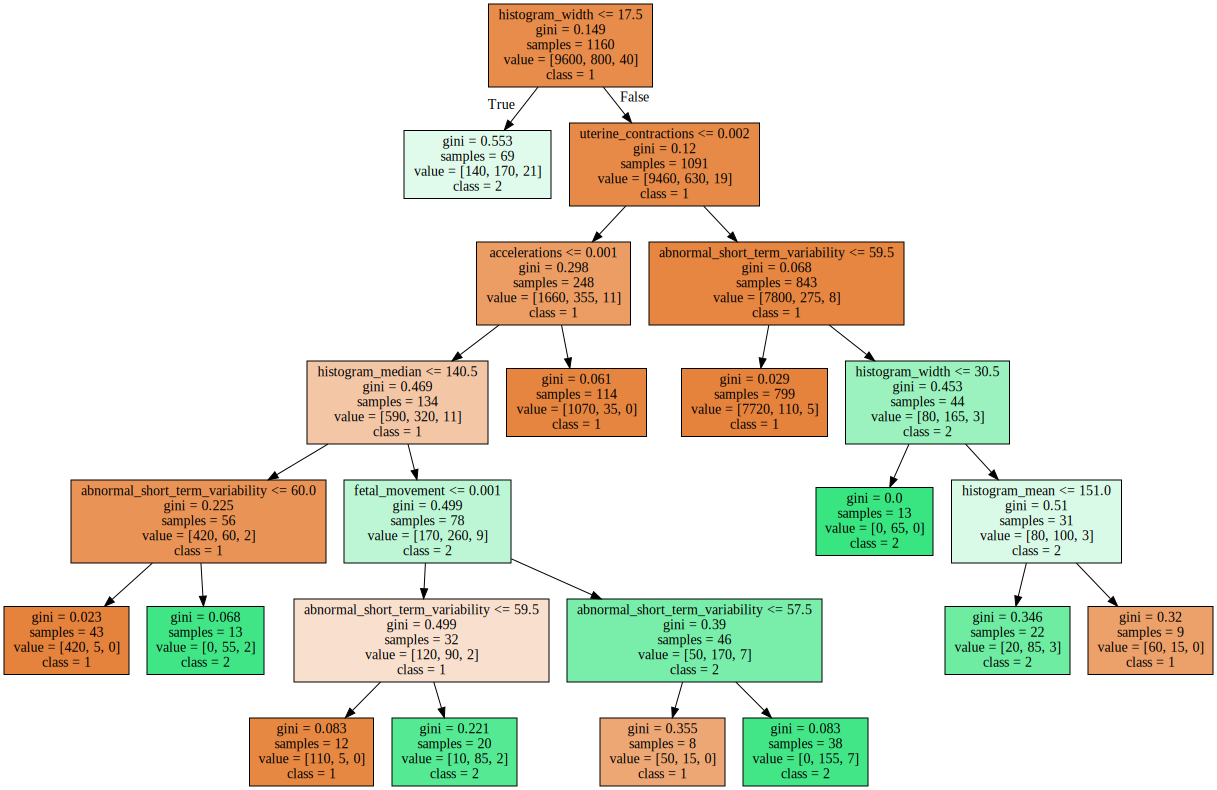

In [ ]:
dot_data = tree.export_graphviz(DT_B_1, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['1', '2', '3'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render('/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_B_1')
graph


## Q2


### Cost Complexity Pruning

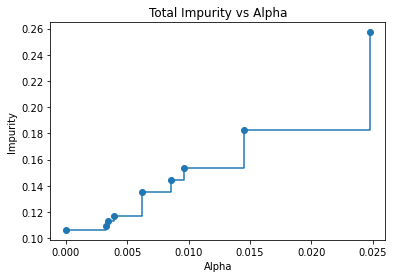

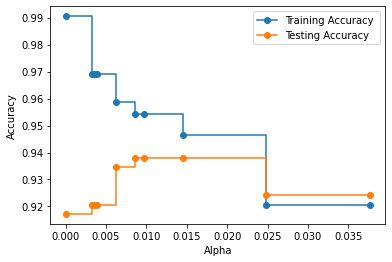

Accuracy : 93.78999999999999%
Precision : 0.9379
Recall : 0.9379


In [ ]:
DT_B_2 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1, max_features = 'sqrt', 
                             class_weight = None, max_leaf_nodes = 15)
path = DT_B_2.cost_complexity_pruning_path(X_train, y_train)
alpha , impure = path.ccp_alphas, path.impurities

plt.plot(alpha[:-1], impure[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Impurity")
plt.title("Total Impurity vs Alpha")
plt.show()

trainacc = []
testacc =  []
for i in alpha:
  t = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1,
                             class_weight = None,ccp_alpha=i)
  t.fit(X_train, y_train)
  trainacc.append(accuracy_score(y_pred=t.predict(X_train), y_true=y_train))
  testacc.append(accuracy_score(y_pred=t.predict(X_test), y_true=y_test))

plt.plot(alpha, trainacc, label = 'Training Accuracy ',marker='o', drawstyle="steps-post")
plt.plot(alpha, testacc, label = 'Testing Accuracy ',marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

opt_alpha = alpha[testacc.index(max(testacc))]
DT_B_2_CC = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1,
                             class_weight =None,ccp_alpha=opt_alpha)
DT_B_2_CC.fit(X_train,y_train)
y_pred = DT_B_2_CC.predict(X_test)
Model_Metrics(y_test,y_pred)

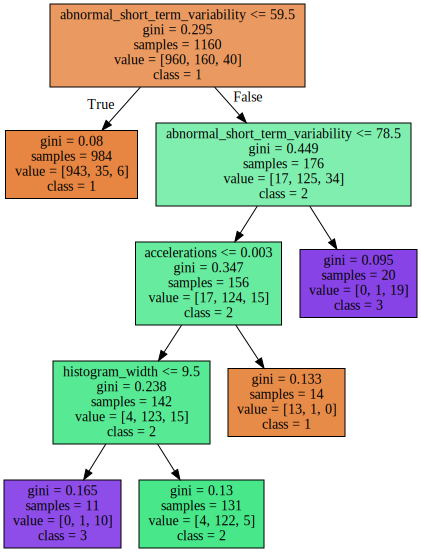

In [ ]:
dot_data = tree.export_graphviz(DT_B_2_CC, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['1', '2', '3'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render('/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_B_2_CC')
graph

### Pre_pruning technqiue

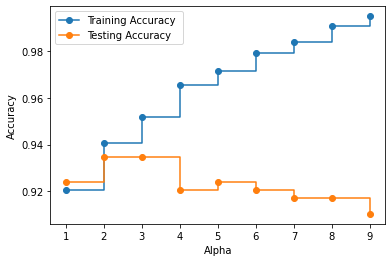

Accuracy : 93.45%
Precision : 0.9345
Recall : 0.9345


In [13]:
max_depth = [i for i in range(1,10)]

trainacc = []
testacc =  []
for i in max_depth:
  t = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = i, min_samples_leaf = 1,
                             class_weight = None)
  t.fit(X_train, y_train)
  trainacc.append(accuracy_score(y_pred=t.predict(X_train), y_true=y_train))
  testacc.append(accuracy_score(y_pred=t.predict(X_test), y_true=y_test))

plt.plot(max_depth, trainacc, label = 'Training Accuracy ',marker='o', drawstyle="steps-post")
plt.plot(max_depth, testacc, label = 'Testing Accuracy ',marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

opt_dep = max_depth[testacc.index(max(testacc))]
DT_B_2_Pre = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = opt_dep, min_samples_leaf = 1,
                             class_weight = None)
DT_B_2_Pre.fit(X_train,y_train)
y_pred = DT_B_2_Pre.predict(X_test)
Model_Metrics(y_test,y_pred)

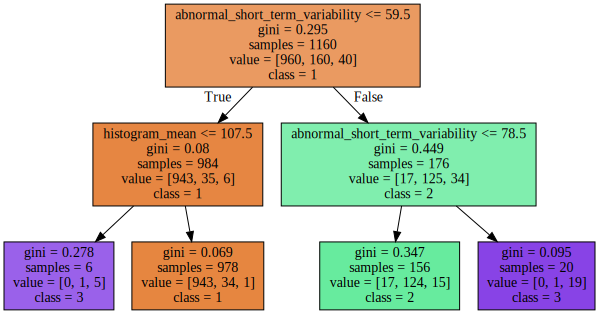

In [ ]:
dot_data = tree.export_graphviz(DT_B_2_Pre, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['1', '2', '3'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render('/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_B_2_Pre')
graph

## Q3

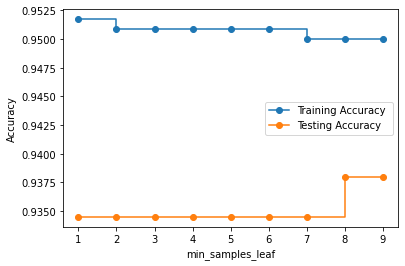

Accuracy : 91.38%
Precision : 0.9138
Recall : 0.9138


In [21]:
def hybridsqil(X_train,y_train,X_test,y_test):
  min_samples_leaf = [i for i in range(1,10)]
  trainacc = []
  testacc =  []
  for i in min_samples_leaf:
    t = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                              min_samples_split = 2, max_depth = 3, min_samples_leaf = i,
                              class_weight = None)
    t.fit(X_train,y_train)
    trainacc.append(accuracy_score(y_pred=t.predict(X_train), y_true=y_train))
    testacc.append(accuracy_score(y_pred=t.predict(X_test), y_true=y_test))

  plt.plot(max_depth, trainacc, label = 'Training Accuracy ',marker='o', drawstyle="steps-post")
  plt.plot(max_depth, testacc, label = 'Testing Accuracy ',marker='o', drawstyle="steps-post")
  plt.xlabel("min_samples_leaf")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  opt_leaf = min_samples_leaf[testacc.index(max(testacc))]
  DT_B_3 = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                              min_samples_split = 2, max_depth = opt_leaf, min_samples_leaf = 3,
                              class_weight = None)
  DT_B_3.fit(X_train,y_train)
  return DT_B_3

DT_B_3 = hybridsqil(X_train,y_train,X_test,y_test)
y_pred = DT_B_3.predict(X_test)
Model_Metrics(y_test,y_pred)

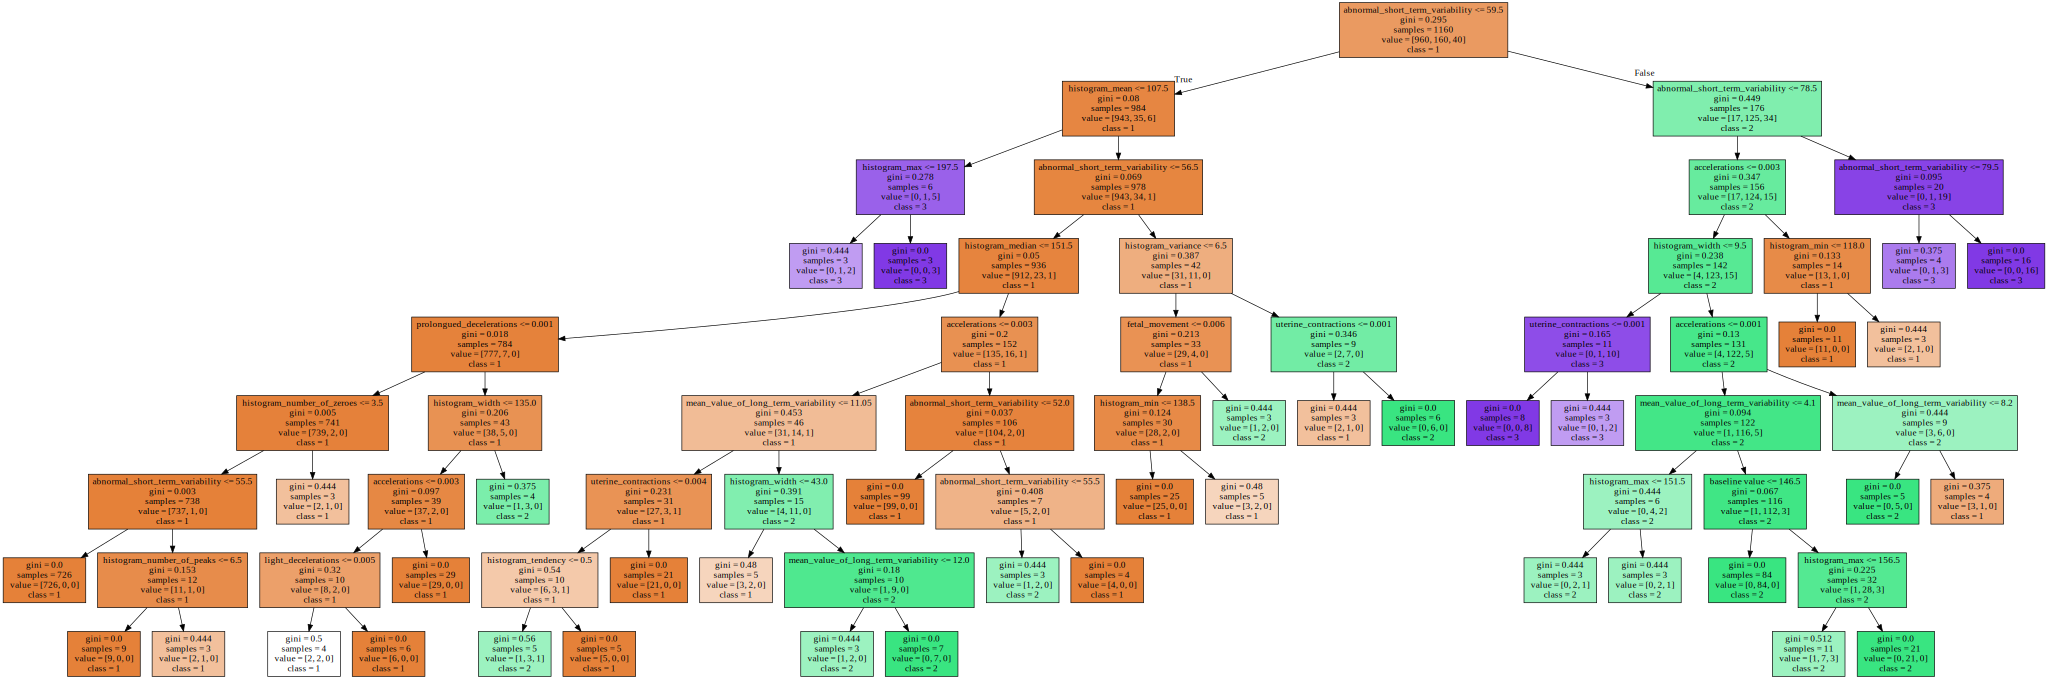

In [15]:
dot_data = tree.export_graphviz(DT_B_3, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['1', '2', '3'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render('/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_B_3')
graph

# C

## Q1

In [16]:
# Prepare data for expirements
y1 = data1['fetal_health']
classes = [1,2,3]
y1 = label_binarize(y1, classes=classes)
X1 = data1.drop(['fetal_health'], axis = 1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42, stratify=y1)
print('='*40)
print('For data1 : ')
print("Shape of X train : ",X_train1.shape)
print("Shape of X test : ",X_test1.shape)
print("Shape of y train : ",y_train1.shape)
print("Shape of y test : ",y_test1.shape)

y2 = data2['fetal_health']
y2 = label_binarize(y2, classes=classes)
X2 = data2.drop(['fetal_health'], axis = 1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42, stratify=y2)
print('='*40)
print('For data2 : ')
print("Shape of X train : ",X_train2.shape)
print("Shape of X test : ",X_test2.shape)
print("Shape of y train : ",y_train2.shape)
print("Shape of y test : ",y_test2.shape)

For data1 : 
Shape of X train :  (1160, 21)
Shape of X test :  (290, 21)
Shape of y train :  (1160, 3)
Shape of y test :  (290, 3)
For data2 : 
Shape of X train :  (540, 21)
Shape of X test :  (136, 21)
Shape of y train :  (540, 3)
Shape of y test :  (136, 3)


Model stats for DT-C-1 on test data: 
Accuracy : 92.41%
Precision : 0.941
Recall : 0.9345


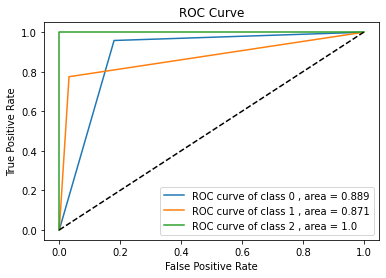

Model stats for DT-C-1-X augment on test data: 
Accuracy : 88.26%
Precision : 0.9167
Recall : 0.9296


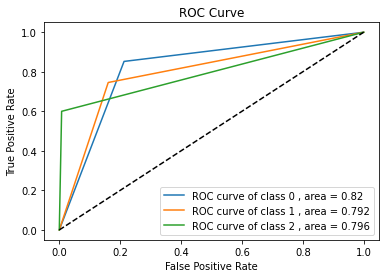

In [17]:
# Train models and show statistics

print('='*40)
print('Model stats for DT-C-1 on test data: ')
DCT_C_1 = OneVsRestClassifier(DecisionTreeClassifier(random_state=10))
DCT_C_1.fit(X_train1, y_train1)
y_pred1 = DCT_C_1.predict(X_test1)
Model_Metrics(y_test1,y_pred1)
plot_roc(DCT_C_1,X_test1,y_test1)

print('='*40)
print('Model stats for DT-C-1-X augment on test data: ')
DCT_C_1_X = OneVsRestClassifier(DecisionTreeClassifier(random_state=10))
DCT_C_1_X.fit(np.vstack((X_train1,X_train2)),np.vstack((y_train1,y_train2)))
y_pred2 = DCT_C_1_X.predict(np.vstack((X_test1,X_test2)))
Model_Metrics(np.vstack((y_test1,y_test2)),y_pred2)
plot_roc(DCT_C_1,np.vstack((X_test1,X_test2)),np.vstack((y_test1,y_test2)))

In [20]:
# Saving model
pickle.dump(DCT_C_1, open("/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_C_1.pkl", 'wb'))
pickle.dump(DCT_C_1_X, open("/content/drive/MyDrive/DMG_Assignment/Assignment_1/DT_C_1_X.pkl", 'wb'))

## Q2


In [ ]:
def boundaryplot(X,Y,obj):  
  
  d1min = X[:,0].min()-1
  d1max = X[:,0].max()+1
  d2min = X[:,1].min()-1
  d2max = X[:,1].max()+1
  d1 = np.arange(d1min,d1max,0.1)
  d2 = np.arange(d2min,d2max,0.1)
  grid1, grid2 = np.meshgrid(d1,d2)
  t1 = grid1.ravel()
  t2 = grid2.ravel()
  xy = np.c_[t1, t2]
  M = obj.predict(xy).reshape(grid1.shape)
  X1 = X[Y==1]
  X2 = X[Y==2]
  X3 = X[Y==3]

  plt.figure(figsize=(13,8))
  plt.contourf(grid1, grid2, M ,cmap=plt.cm.RdYlBu)
  plt.scatter(X1[:,0], X1[:,1], s = 25, c = 'Aqua', label = '1', edgecolor='Blue',cmap=plt.cm.RdYlBu)           
  plt.scatter(X2[:,0], X2[:,1], s = 25 ,c = 'White', label = '2', edgecolor='Black',cmap=plt.cm.RdYlBu)
  plt.scatter(X3[:,0], X3[:,1], s = 25 ,c = 'Black', label = '3', edgecolor='Red',cmap=plt.cm.RdYlBu)           
  plt.axis('tight')
  plt.xlabel('D1')
  plt.ylabel('D2')
  plt.legend()
  plt.title('Decision Boundary')  
  plt.show()



In [ ]:
tsne = TSNE(n_components=2)
X_red = tsne.fit_transform(X)
X_train_red, X_test_red, y_train, y_test = train_test_split(X_red, y, test_size=0.20, random_state=42, stratify=y)
print("Shape of X train : ",X_train_red.shape)
print("Shape of X test : ",X_test_red.shape)
print("Shape of y train : ",y_train.shape)
print("Shape of y test : ",y_test.shape)

Shape of X train :  (1160, 2)
Shape of X test :  (290, 2)
Shape of y train :  (1160,)
Shape of y test :  (290,)


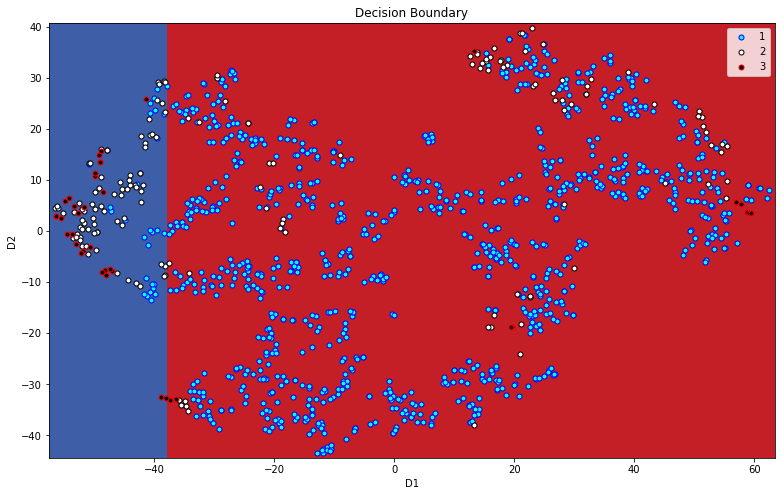

In [ ]:
# Fitting Best Model
DT_B_2_CC_Decision = DecisionTreeClassifier(random_state=42, criterion= 'gini', splitter= 'best',
                             min_samples_split = 2, max_depth = 8, min_samples_leaf = 1,
                             class_weight =None,ccp_alpha=opt_alpha)
DT_B_2_CC_Decision.fit(X_train_red,y_train)
boundaryplot(X_train_red,y_train,DT_B_2_CC_Decision)
